#Import functions:

In [1]:
%matplotlib notebook
import os
import sys
import numpy as np
import camb
from camb import model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate
from scipy.optimize import curve_fit

In [2]:
#Import the results of the latest angular correlation function
#file1 = '/Users/johntimlin/Clustering/Combine_SpIES_Shela/KDE_RF_candidates/Angular/SpSh_clustering_kderf_v1.txt'
file1 = '../Compute_Correlation2/Final_Clustering_All.txt'
wdat = open(file1,'rw')
header = wdat.readline()

#From this file, pull out the separation (theta) the correlation function value at that distance, and the pair counts
th = []
w = []
DD = []
DR = []
RR = []
for i in wdat.readlines():
	t = float(i.split()[0]) #Theta
	x = float(i.split()[4]) #w(theta)
	dd = float(i.split()[1]) #DD
	dr = float(i.split()[2]) #DR
	rr = float(i.split()[3]) #RR
	th.append(t)
	w.append(x)
	DD.append(dd)
	DR.append(dr)
	RR.append(rr)

print w

[-1.84914831178, -0.753533791885, -0.780861591239, -0.756170684805, 0.755619737024, -0.459396593668, 0.506712111707, 0.0731136899962, 0.247031479414, 0.268863271815, 0.15843607938, 0.100346430838, 0.0335445121883, 0.0152570497141, -0.0142391858002, 0.00240743978784, -0.00465262688083, -0.00475459191737, -0.00667670043128, 0.00595969651812, 0.0023552869176]


In [3]:
####################################
#CALCULATE Poisson and Field to Field ERROR BARS
####################################
# Get the size of the w(theta) array
size = float(len(th))
#Sum the RR's to find the total pair counts for Field to Field error calcualtion
totRR=np.sum(RR)
print totRR
#Sum the DD's to find the total pair counts for Poisson error calcualtion
totQQ = np.sum(DD)
#Generate an array of the w(theta) values
om = np.asarray(w)
#Calculate the Field to Field error
#Errors = (1 + om)/np.sqrt(totRR/size)
#f2f = np.asarray(Errors)

#Calculate the Poisson errors
Errors = (1 + om)/np.sqrt(totQQ/size)
poisson = np.asarray(Errors)


3152848496.0


In [4]:
####################################
#COMPUTE ERROR BARS FROM JACKKNIFE
###################################

#jkfile = '/Users/johntimlin/Clustering/Combine_SpIES_Shela/KDE_RF_candidates/Angular/SpSh_clustering_kderf_JK_v1.txt'
jkfile = '../Compute_Correlation2/Final_Clustering_All_JK.txt'
jkdat = open(jkfile,'rw')


#Read the header of the jackknife file and assign the number of jackknife resamples done for the sample
jkhead = jkdat.readline()
jknum= np.float(jkhead.split()[7])

#Pull out the proper info from the file (RR,Xi,etc.) for each jackknife and put into array
RRjk = np.zeros([jknum,int(size)])
Xijk = np.zeros([jknum,int(size)])
Thjk = np.zeros([jknum,int(size)])

num=jkdat.readlines()
row = 0
k=0

for j in range(len(num)):
	#At the end of a Jackknife run, I create a new line called 'STEP_DONE' which tells me that my next JK routine is running and separates the two.
	if num[j].split()[0] == 'STEP_DONE':
		row +=1
		k=0
	#For each of the JK runs, append the info into arrays
	else:
		Thjk[row,k] = float(num[j].split()[0])
		RRjk[row,k] = float(num[j].split()[3])
		Xijk[row,k] = float(num[j].split()[4])
		k+=1

    
#Compute the main diagonal of the covariance matrix (Update to include full matrix)
c=0
C=[]
for i in range(len(Thjk)):
    sig = (np.sqrt(np.asarray(RRjk[i])/np.asarray(RR))*(Xijk[i]-om))**2
    c+=sig
    if i+1 == len(Xijk):
        C.append(c)
print C



TypeError: 'float' object cannot be interpreted as an index

In [6]:
#Following Limber was computed with cosmology (H0,oM,oL)=(70 0.274489795918 0.725510204082)
#mclimber_fine = [0.0018814780704217401, 0.0015577956352217422, 0.0013306043095128227, 0.001171466971572455, 0.0010534252343705221, 0.00093887268562430298, 0.00079949208519404806, 0.00067455196629976038, 0.00054776472753383034, 0.00038752913219755868, 0.00026868907936904374, 0.00017062894323952539, 9.2977586998475802e-05, 3.1785405667055796e-05, 1.7689061596557254e-05, 3.9190520527579569e-06, -1.2262842028567521e-06, -1.1059642838929648e-06, -1.262051979915565e-06, -3.1727942568913904e-07]
mclimber_fine = [0.0018763493756045195, 0.0015591052537067829, 0.0013261541719343291, 0.0011664782432483816, 0.0010404309744665909, 0.00091741906231659518, 0.00078667114128277277, 0.00064789973106323866, 0.0005049509301372051, 0.00036797906601997838, 0.00024422862731641093, 0.00014404571216926446, 7.2933582496721974e-05, 2.9223826003039019e-05, 7.8230852216102688e-06, 2.9890491694937377e-06, -2.307437559147607e-06, -9.1226385750823894e-07, -3.9755941765663542e-07, 1.3928717601483434e-08]
limber = np.asarray(mclimber_fine)*np.pi
#Interpolate Limber (you get the same function back) to plug in any z in the range (as opposed to set z values)
Limber = interpolate.interp1d(np.logspace(-1.3,2.4,20),limber)
print np.logspace(-1.3,2.4,20)
print limber

[  5.01187234e-02   7.84759970e-02   1.22877873e-01   1.92402418e-01
   3.01264090e-01   4.71719914e-01   7.38619982e-01   1.15653264e+00
   1.81090112e+00   2.83551258e+00   4.43985126e+00   6.95192796e+00
   1.08853427e+01   1.70442913e+01   2.66879853e+01   4.17881006e+01
   6.54318913e+01   1.02453386e+02   1.60421716e+02   2.51188643e+02]
[  5.89472541e-03   4.89807361e-03   4.16623620e-03   3.66459948e-03
   3.26861031e-03   2.88215699e-03   2.47140028e-03   2.03543704e-03
   1.58635013e-03   1.15604033e-03   7.67266861e-04   4.52532951e-04
   2.29127607e-04   9.18093571e-05   2.45769471e-05   9.39037491e-06
  -7.24902888e-06  -2.86596143e-06  -1.24896975e-06   4.37583569e-08]


In [7]:
#Fit Limber to wtheta to get ideal bias value
def L(theta,b):
    l = b**2 * Limber(theta)
    return l

gdx = (np.asarray(th)>0.41) & (np.asarray(th)<20)
#gdx = ()
bias, bcov = curve_fit(L, np.asarray(th)[gdx], np.asarray(w)[gdx], sigma = C[0][gdx]**0.5,absolute_sigma=True)

'''
print th
print w
print Limber(th)
print np.sqrt(w/Limber(th))
'''
print bias

[ 15.39237233]


## Stellar Contamination
From stellar contamination plot, at >30' it seems that contamination is at w_ss = 0.09. If that is the case, we can compute the correlation function as follows:

$\omega(\theta) = a^{2}\omega_{QQ}(\theta) + (1-a)^{2}\omega_{ss} + \epsilon(\theta)$

For now, set $\epsilon=0$

so

$\omega(\theta) = a^{2}\omega_{QQ}(\theta) + 0.09(1-a)^{2}$

For a = 0.97 (3% contamination):

In [8]:
def stellar_cont(theta,b,a,e):
    w_cont = (a**2 *b**2 * Limber(theta)) + (0.09*(1-a)**2)+e
    return w_cont

bdx = (np.asarray(th)>0.2) & (np.asarray(th)<100)
fitcont, pcov = curve_fit(stellar_cont, np.asarray(th)[bdx], np.asarray(w)[bdx], sigma = C[0][bdx]**0.5,absolute_sigma=True, bounds=([-np.inf,0.,-np.inf],[np.inf,1.,np.inf]))
print fitcont

[ 13.87029262   0.95637787   0.03373327]


In [9]:
#Parameters from Myers2006 Power law fit
t = np.linspace(-1.40,2.4,15)
thet=10**t
omegaall = (0.056) * thet**(-0.91)
omegasmall=(0.11) * (10**np.linspace(-1.4,0,10))**(-0.4)
omegamid = (0.035) * (10**np.linspace(0,1.69,10))**(-0.55)
omegalarge=(0.066) * (10**np.linspace(0,2.3,10))**(-0.98)
M2007 = (0.0493) * thet**(-0.928)

In [10]:
#Plotting Parameters (Replace with Group code call!)
params = {'legend.fontsize': 16, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'xtick.major.width':2, 'xtick.minor.width':2, 'ytick.major.width':2, 'ytick.minor.width':2, 'xtick.major.size':8, 'xtick.minor.size':6, 'ytick.major.size':8, 'ytick.minor.size':6}
plt.rcParams.update(params)
plt.rc("axes", linewidth=3.0)

<IPython.core.display.Javascript object>


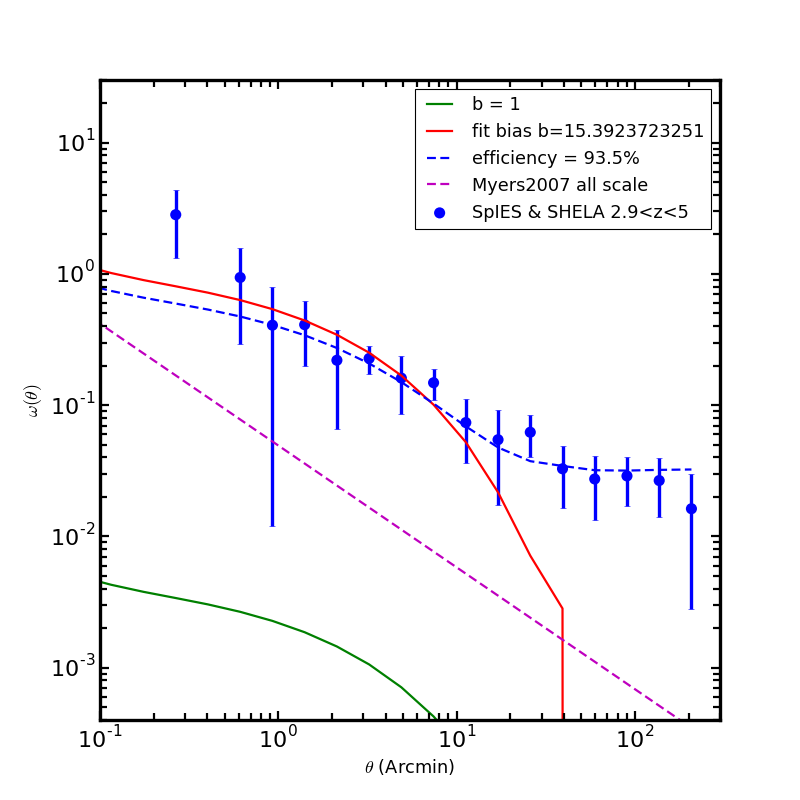

In [11]:
plt.figure(1,figsize=[10,10])
plt.scatter(th,w,s = 100, edgecolor='None',label='SpIES & SHELA 2.9<z<5')
plt.errorbar(th,w,yerr=C[0]**0.5,elinewidth=3,fmt=',',color='b')
plt.plot(th,1**2*Limber(th),linewidth = 2,color = 'g',label='b = 1')
plt.plot(th,bias[0]**2*Limber(th),linewidth = 2,color = 'r',label='fit bias b=%s'%bias[0])
plt.plot(th,stellar_cont(th,13.75314366,0.93533301,0.03210163),linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='efficiency = 93.5%')
'''
plt.plot(th,stellar_cont(th,0.9),linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='efficiency = 90%')
plt.plot(th,stellar_cont(th,0.8),linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='efficiency = 80%')
plt.plot(th,stellar_cont(th,0.7),linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='efficiency = 70%')
plt.plot(th,stellar_cont(th,0.6),linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='efficiency = 60%')
'''
#plt.plot(th,8**2*Limber(th),linewidth = 2,color = 'k',label='Shen07 b=8 z=3')
#plt.plot(th,16**2*Limber(th),linewidth = 2,color = 'y',label='Shen07 b=16 z=4')
#plt.plot(thet,omegaall,linewidth=2,label = 'Myers2006 all scale')
#plt.plot(10**np.linspace(-1.4,0,10),omegasmall,linewidth=2,linestyle='-.',dashes = [8,4,2,4],label = 'Myers 2006 small scale')
#plt.plot(10**np.linspace(0,1.69,10),omegamid,linewidth=2,linestyle='--',dashes = [8,4,8,4],label = 'Myers 2006 med scale')
#plt.plot(10**np.linspace(0,2.3,10),omegalarge,linewidth=2,linestyle=':',dashes = [2,4,2,4],label = 'Myers 2006 large scale')
plt.plot(thet,M2007,linewidth=2,linestyle='--',dashes = [8,4,8,4], color = 'm',label = 'Myers2007 all scale')

'''
x1 = np.linspace(4,25,100)
x = np.linspace(4,150,100)
Efit = ((np.sqrt(np.pi)*gamma(1/2.0)/gamma(1.0)))*(x1/8.12)**-2
Sfit = ((gamma(0.5)*gamma(1.33/2.0))/gamma(2.33/2.0)) *(x/16.1)**-2.33

plt.scatter(Er,EwEr,c='r',marker='o',label=('Eftekharzadeh 2015'))
plt.errorbar(Er,EwEr,yerr=np.asarray(eerr)/np.asarray(Er),c='r',fmt='o')
plt.plot(x1,Efit,c='r',linestyle='--',label=('Eftekharzadeh 2015 fit'))
plt.plot(x,Sfit,c='g',linestyle='--',label=('Shen 2007 fit'))
plt.scatter(sr,swsr,c='g',marker='o',label=('Shen 2007'))
plt.errorbar(sr,swsr,yerr=serr,c='g',fmt='o')
#plot the fit to SpIES data
#plt.plot(RP[(RP>3.5) & (RP<30)],Power(RP[(RP>3.5) & (RP<30)],popt[0],popt[1]))
plt.plot(RP[(RP>3.5) & (RP<30)],Powerfixed(RP[(RP>3.5) & (RP<30)],popt[0]))
'''

#plt.axvline(4)
#plt.axvline(25)
plt.xlim(10**-1,300)
plt.ylim(4*10**-4,30)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta$ (Arcmin)',fontsize = 16)
plt.ylabel(r'$\omega (\theta)$',fontsize = 16)
plt.legend(scatterpoints=1)
#plt.savefig('SpSh_angular_corr_JKerr_v2.png')
plt.show()

In [12]:
#Stellar contamination plot
#Open star data
stardat = open('/Users/johntimlin/Clustering/Combine_SpIES_Shela/Star_Gal_cross/gcut_Stars/Stars_ang_crosstest_v4.txt','rw')
header = stardat.readline()


thst = []
xist = []
DDst = []
DRst = []
RRst = []
for i in stardat.readlines():
	t = float(i.split()[0])
	x = float(i.split()[4])
	dd = float(i.split()[1])
	dr = float(i.split()[2])
	rr = float(i.split()[3])
	thst.append(t)
	xist.append(x)
	DDst.append(dd)
	DRst.append(dr)
	RRst.append(rr)
	
size = np.sqrt(float(len(thst)))
RRpairsst=np.asarray(RRst)

totRRst=np.asarray(np.sum(RRpairsst,axis=0))

plt.figure(2,figsize=[10,10])
plt.scatter(th,w,s = 100, edgecolor='None',label='SpIES & SHELA 2.9<z<5')
plt.errorbar(th,w,yerr=C[0]**0.5,elinewidth=3,fmt=',',color='b')
plt.scatter(thst,xist,s = 100,color = 'r', edgecolor='None',label=('SDSS stars'))
plt.plot(th,1**2*Limber(th),linewidth = 2,color = 'g',label='b = 1')
plt.plot(th,bias[0]**2*Limber(th),linewidth = 2,color = 'r',label='fit bias b=%s'%bias[0])
plt.plot(th,stellar_cont(th,0.9),linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='efficiency = 90%')
plt.plot(th,stellar_cont(th,0.8),linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='efficiency = 80%')
plt.plot(th,stellar_cont(th,0.7),linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='efficiency = 70%')
plt.plot(th,stellar_cont(th,0.6),linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='efficiency = 60%')
plt.plot(thet,M2007,linewidth=2,linestyle='--',dashes = [8,4,8,4], color = 'm',label = 'Myers2007 all scale')

plt.xlim(10**-1,300)
plt.ylim(4*10**-4,10)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta$ (Arcmin)',fontsize = 16)
plt.ylabel(r'$\omega (\theta)$',fontsize = 16)
plt.legend(scatterpoints=1)
#plt.savefig('SpSh_angular_corr_JKerr_v2.png')
plt.show()


<IPython.core.display.Javascript object>

TypeError: stellar_cont() takes exactly 4 arguments (2 given)

In [15]:
#Integral Constraint
Nrr = np.asarray(RR)
Theta = np.asarray(th)
delta = 0.928

IC = np.sum(Nrr * Theta**(-delta))/np.sum(Nrr)
print IC

0.5*((Theta**(-delta))-IC)

0.0155381871768


array([  8.00389680e+00,   5.43702028e+00,   3.69255138e+00,
         2.50699698e+00,   1.70128515e+00,   1.15371724e+00,
         7.81585893e-01,   5.28682588e-01,   3.56807570e-01,
         2.39999993e-01,   1.60616672e-01,   1.06667159e-01,
         7.00026586e-02,   4.50851836e-02,   2.81510772e-02,
         1.66425290e-02,   8.82123171e-03,   3.50581829e-03,
        -1.06577303e-04,  -2.56158896e-03,  -4.23003364e-03])

<IPython.core.display.Javascript object>


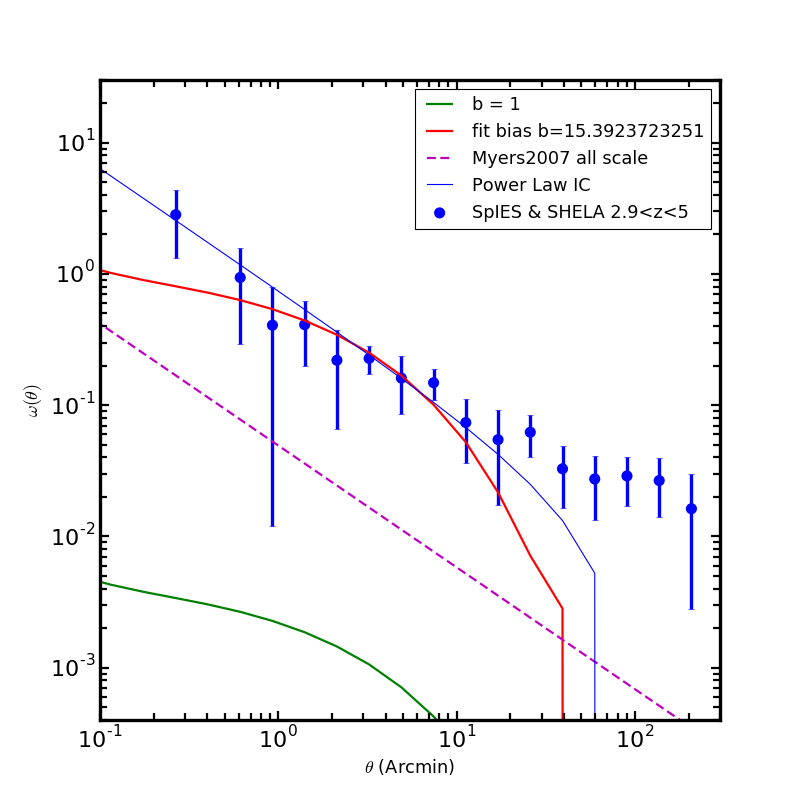

In [18]:
plt.figure(3,figsize=[10,10])
plt.scatter(th,w,s = 100, edgecolor='None',label='SpIES & SHELA 2.9<z<5')
plt.errorbar(th,w,yerr=C[0]**0.5,elinewidth=3,fmt=',',color='b')
plt.plot(th,1**2*Limber(th),linewidth = 2,color = 'g',label='b = 1')
plt.plot(th,bias[0]**2*Limber(th),linewidth = 2,color = 'r',label='fit bias b=%s'%bias[0])
#plt.plot(th,bias[0]**2*Limber(th)-IC,linewidth = 2,color = '#FFA500',label='Limber IC')

#plt.plot(th,stellar_cont(th,13.75314366,0.93533301,0.03210163),linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='efficiency = 93.5%')
#plt.plot(th,stellar_cont(th,13.75314366,0.93533301,0.03210163)-IC,linewidth = 2, linestyle = '--',dashes = [8,4,8,4],label='Limber IC')

plt.plot(thet,M2007,linewidth=2,linestyle='--',dashes = [8,4,8,4], color = 'm',label = 'Myers2007 all scale')
plt.plot(Theta,0.75*((Theta**(-0.928))-IC),label = 'Power Law IC')

plt.xlim(10**-1,300)
plt.ylim(4*10**-4,30)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta$ (Arcmin)',fontsize = 16)
plt.ylabel(r'$\omega (\theta)$',fontsize = 16)
plt.legend(scatterpoints=1)
#plt.savefig('SpSh_angular_corr_JKerr_v2.png')
plt.show()